In [21]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [22]:
onecall = True  # 8 days
#onecall = False # 5 days

In [23]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [24]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [25]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [26]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,uvi,rain
0,29/08,07:03,20:39,01:24,18:59,0.85,"{'day': 23.37, 'min': 19.9, 'max': 26.82, 'nig...","{'day': 23.38, 'night': 20.84, 'eve': 24.87, '...",1018,62,15.68,4.06,3,9.06,"[{'id': 801, 'main': 'Clouds', 'description': ...",19,0.00,4.24,NaN
1,30/08,07:05,20:37,02:31,19:34,0.88,"{'day': 20.87, 'min': 16.94, 'max': 21.86, 'ni...","{'day': 20.92, 'night': 18.95, 'eve': 21.28, '...",1019,73,15.75,3.89,18,8.16,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,1.00,1.12,2.16
2,31/08,07:06,20:35,03:45,19:59,0.92,"{'day': 24.85, 'min': 17.33, 'max': 27.99, 'ni...","{'day': 25.06, 'night': 23.18, 'eve': 25.9, 'm...",1017,64,17.48,3.20,29,8.04,"[{'id': 501, 'main': 'Rain', 'description': 'm...",91,1.00,4.53,5.22
3,01/09,07:07,20:33,04:58,20:17,0.95,"{'day': 24.63, 'min': 20.46, 'max': 28.1, 'nig...","{'day': 25, 'night': 23.83, 'eve': 26.19, 'mor...",1013,71,18.81,2.91,250,5.05,"[{'id': 501, 'main': 'Rain', 'description': 'm...",98,1.00,4.55,5.74
4,02/09,07:09,20:31,06:10,20:32,0.98,"{'day': 23.33, 'min': 18.07, 'max': 23.33, 'ni...","{'day': 23.44, 'night': 17.6, 'eve': 19.27, 'm...",1014,66,16.54,3.93,319,5.90,"[{'id': 500, 'main': 'Rain', 'description': 'l...",57,0.70,3.27,0.68
5,03/09,07:10,20:29,07:20,20:46,0.00,"{'day': 21.56, 'min': 14.72, 'max': 23.28, 'ni...","{'day': 20.74, 'night': 19.09, 'eve': 20.89, '...",1017,37,5.99,3.22,306,5.92,"[{'id': 800, 'main': 'Clear', 'description': '...",2,0.00,4.00,NaN
6,04/09,07:12,20:27,08:27,20:58,0.04,"{'day': 19.87, 'min': 17.22, 'max': 20.99, 'ni...","{'day': 19.43, 'night': 17.67, 'eve': 20.07, '...",1016,58,11.21,3.01,254,4.70,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,0.86,4.00,1.14
7,05/09,07:13,20:25,09:34,21:09,0.07,"{'day': 19.93, 'min': 14.02, 'max': 21.26, 'ni...","{'day': 19.55, 'night': 16.9, 'eve': 18.8, 'mo...",1014,60,11.57,3.03,27,7.43,"[{'id': 500, 'main': 'Rain', 'description': 'l...",57,1.00,4.00,4.23


In [27]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'uvi', 'rain'],
       dtype='object'),
 19)

In [28]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            30/08
sunrise       07:05
sunset        20:37
moonrise      02:31
moonset       19:34
moon_phase     0.88
pressure       1019
humidity         73
dew_point     15.75
wind_speed     3.89
wind_deg         18
wind_gust      8.16
pop             1.0
uvi            1.12
Name: 1, dtype: object

In [29]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17])

In [30]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV
dt                                                        29/08
sunrise                                                   07:03
sunset                                                    20:39
moonrise                                                  01:24
moonset                                                   18:59
moon_phase                                                 0.85
temp          {'day': 23.37, 'min': 19.9, 'max': 26.82, 'nig...
feels_like    {'day': 23.38, 'night': 20.84, 'eve': 24.87, '...
pressure                                                   1018
humidity                                                     62
dew_point                                                 15.68
wind_speed                                                 4.06
wind_deg                                                      3
wind_gust                                                  9.06
weather       [{'id': 801, 'main': 'Clouds', 'description': ...
clouds                      

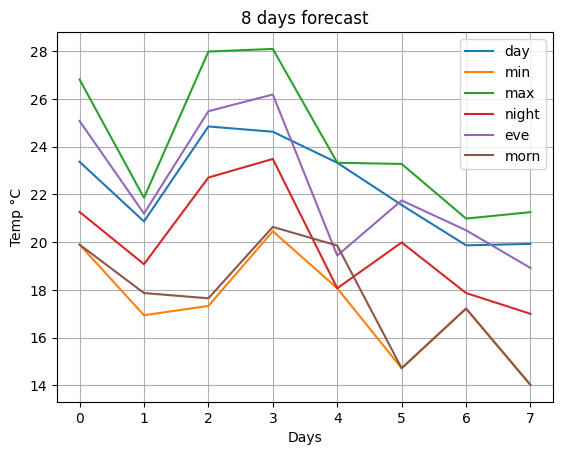

In [31]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [32]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1724932800, 'main': {'temp': 23.95, 'feels_like': 23.92, 'temp_min': 23.95, 'temp_max': 26.28, 'pressure': 1018, 'sea_level': 1018, 'grnd_level': 1009, 'humidity': 58, 'temp_kf': -2.33}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'clouds': {'all': 32}, 'wind': {'speed': 2.05, 'deg': 323, 'gust': 2}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-29 12:00:00'}, {'dt': 1724943600, 'main': {'temp': 25.48, 'feels_like': 25.34, 'temp_min': 25.48, 'temp_max': 26.82, 'pressure': 1018, 'sea_level': 1018, 'grnd_level': 1009, 'humidity': 48, 'temp_kf': -1.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 67}, 'wind': {'speed': 2.91, 'deg': 334, 'gust': 2.17}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-29 15:00:00'}, {'dt': 1724954400, 'main': {'temp': 23.8

In [33]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1724932800
main          {'temp': 23.95, 'feels_like': 23.92, 'temp_min...
weather       [{'id': 802, 'main': 'Clouds', 'description': ...
clouds                                              {'all': 32}
wind                     {'speed': 2.05, 'deg': 323, 'gust': 2}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'd'}
dt_txt                                      2024-08-29 12:00:00
rain                                                        NaN
Name: 0, dtype: object


In [34]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain'],
      dtype='object')

In [35]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   29/08 14:00  14:00     26.28     23.95
1   29/08 17:00  17:00     26.82     25.48
2   29/08 20:00  20:00     23.89     23.89
3   29/08 23:00  23:00     21.27     21.27
4   30/08 02:00  02:00     19.91     19.91
5   30/08 05:00  05:00     18.45     18.45
6   30/08 08:00  08:00     17.55     17.55
7   30/08 11:00  11:00     18.74     18.74
8   30/08 14:00  14:00     20.79     20.79
9   30/08 17:00  17:00     21.65     21.65
10  30/08 20:00  20:00     21.05     21.05
11  30/08 23:00  23:00     19.08     19.08
12  31/08 02:00  02:00     17.60     17.60
13  31/08 05:00  05:00     17.42     17.42
14  31/08 08:00  08:00     17.76     17.76
15  31/08 11:00  11:00     21.91     21.91
16  31/08 14:00  14:00     25.38     25.38
17  31/08 17:00  17:00     27.04     27.04
18  31/08 20:00  20:00     24.57     24.57
19  31/08 23:00  23:00     22.71     22.71
20  01/09 02:00  02:00     21.17     21.17
21  01/09 05:00  05:00     20.46     20.46
22  01/09 0

In [36]:
_5days['human_date']

0     29/08 14:00
1     29/08 17:00
2     29/08 20:00
3     29/08 23:00
4     30/08 02:00
5     30/08 05:00
6     30/08 08:00
7     30/08 11:00
8     30/08 14:00
9     30/08 17:00
10    30/08 20:00
11    30/08 23:00
12    31/08 02:00
13    31/08 05:00
14    31/08 08:00
15    31/08 11:00
16    31/08 14:00
17    31/08 17:00
18    31/08 20:00
19    31/08 23:00
20    01/09 02:00
21    01/09 05:00
22    01/09 08:00
23    01/09 11:00
24    01/09 14:00
25    01/09 17:00
26    01/09 20:00
27    01/09 23:00
28    02/09 02:00
29    02/09 05:00
30    02/09 08:00
31    02/09 11:00
32    02/09 14:00
33    02/09 17:00
34    02/09 20:00
35    02/09 23:00
36    03/09 02:00
37    03/09 05:00
38    03/09 08:00
39    03/09 11:00
Name: human_date, dtype: object

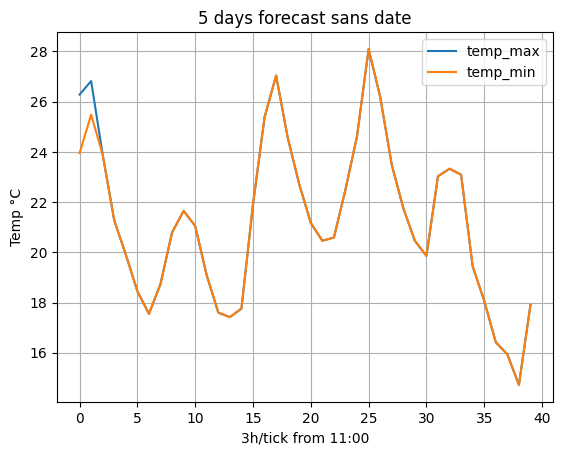

In [37]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [38]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

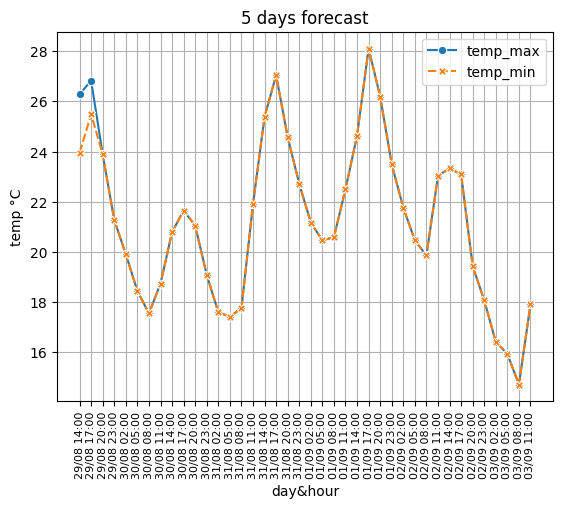

In [39]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

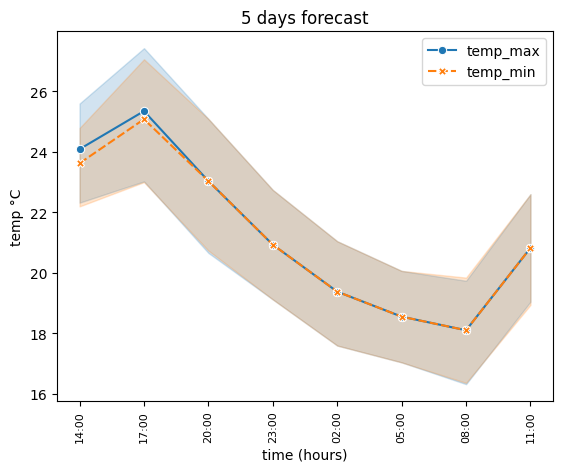

In [40]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 